In [ ]:
# Importing the Keras libraries and other packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


#Build the CNN

In [ ]:
#Initializing the CNN
classifier = Sequential()

In [ ]:
#Step 1 - Convolution
classifier.add(Conv2D(filters=32, kernel_size=3,
                      input_shape = (64, 64, 3), activation='relu'))
#Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size= (2,2)))

In [ ]:
#Adding a second convulational layer
classifier.add(Conv2D(filters=32, kernel_size=3,
                      activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))

In [ ]:
#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
#Compiling the CNN
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
#test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Đọc data
training_set = train_datagen.flow_from_directory('image/training_set',
                                                 target_size= (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('image/test_set',
                                                 target_size= (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5937 images belonging to 2 classes.
Found 1340 images belonging to 2 classes.


In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
#khai báo call back có dừng sớm và lưu model tại checkpoint (khi có sự cố)
callbacks = [EarlyStopping(monitor='val_loss',
                           patience=20),
             ModelCheckpoint('model_checkpoint_20211106.h5',
                             save_best_only=True)]

In [ ]:
print(datetime.now())

2021-11-07 00:34:30.896381


In [ ]:
history = classifier.fit(training_set,
                         epochs = 100,
                         validation_data = test_set,
                         callbacks=callbacks)

Epoch 1/100
186/186 [==============================] - 1877s 10s/step - loss: 0.4270 - accuracy: 0.8046 - val_loss: 0.5830 - val_accuracy: 0.7381
Epoch 2/100
186/186 [==============================] - 49s 264ms/step - loss: 0.3104 - accuracy: 0.8674 - val_loss: 0.5585 - val_accuracy: 0.7634
Epoch 3/100
186/186 [==============================] - 49s 266ms/step - loss: 0.2369 - accuracy: 0.9065 - val_loss: 0.4583 - val_accuracy: 0.8119
Epoch 4/100
186/186 [==============================] - 49s 266ms/step - loss: 0.2058 - accuracy: 0.9192 - val_loss: 0.4614 - val_accuracy: 0.8082
Epoch 5/100
186/186 [==============================] - 49s 265ms/step - loss: 0.1809 - accuracy: 0.9294 - val_loss: 0.4712 - val_accuracy: 0.8134
Epoch 6/100
186/186 [==============================] - 50s 267ms/step - loss: 0.1519 - accuracy: 0.9434 - val_loss: 0.4639 - val_accuracy: 0.8179
Epoch 7/100
186/186 [==============================] - 50s 267ms/step - loss: 0.1437 - accuracy: 0.9480 - val_loss: 0.4432 -

In [ ]:
print(datetime.now())

2021-11-07 01:27:04.251103


In [ ]:
history_frame = pd.DataFrame(history.history)

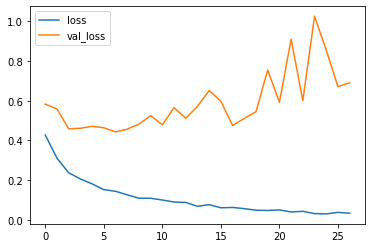

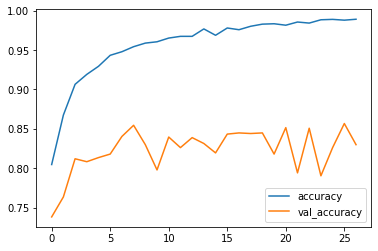

In [ ]:
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

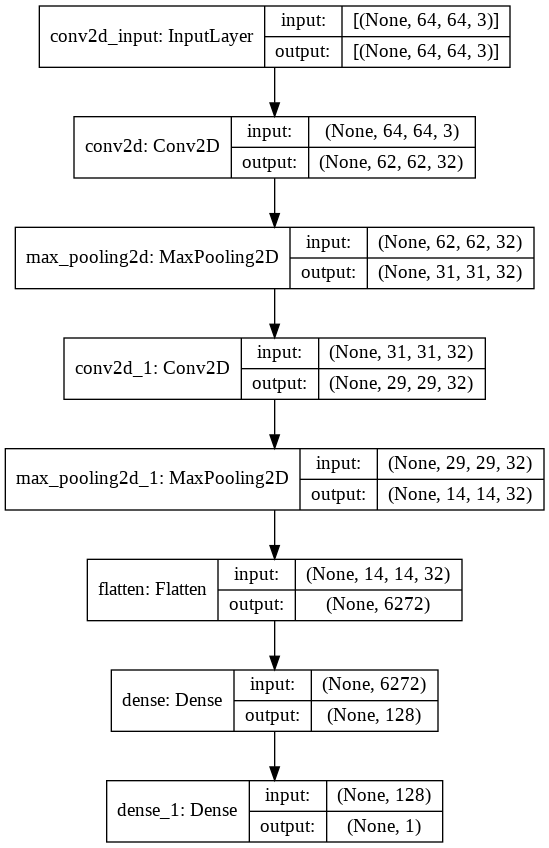

In [ ]:
plot_model(classifier, to_file='CNN_model_20211106.png', show_shapes=True)
Image(filename='CNN_model_20211106.png')

In [ ]:
#save model
classifier.save('model_CNN_predict_eagle_owl_20211106.h5')
print('save!!!')

save!!!
